## <center>ANN Binary Classification on Gender Classification Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN

In [2]:
data = pd.read_csv('./gender_classification.csv')
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data.shape

(5001, 8)

In [4]:
data.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [5]:
data.duplicated().sum()

1768

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
le = LabelEncoder()

In [9]:
data['gender'] = le.fit_transform(data.gender)

In [10]:
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 214.7 KB


In [12]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

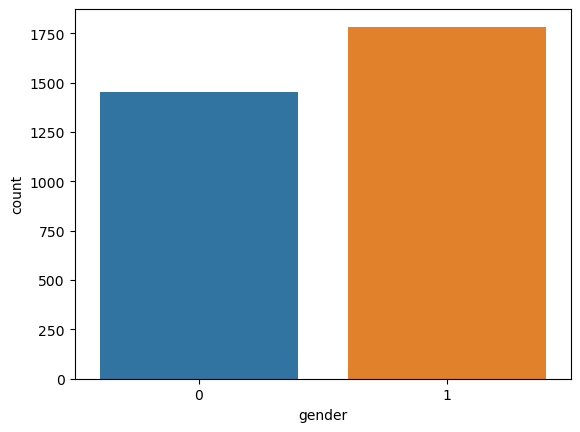

In [13]:
sns.countplot(data=data,x = y)
plt.show()

### Balancing

In [14]:
ROS = RandomOverSampler()

In [15]:
x,y = ROS.fit_resample(x,y)

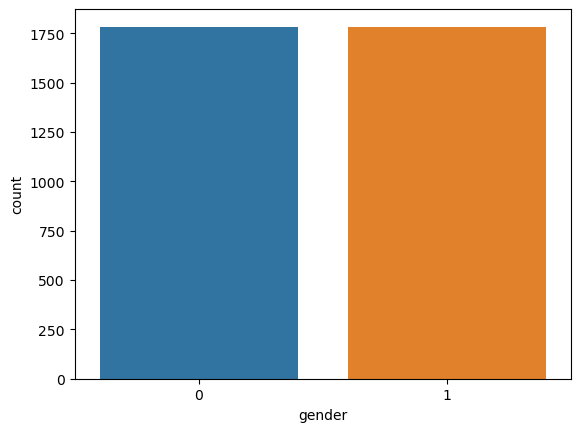

In [16]:
sns.countplot(data=data, x= y)
plt.show()

### Heatmap

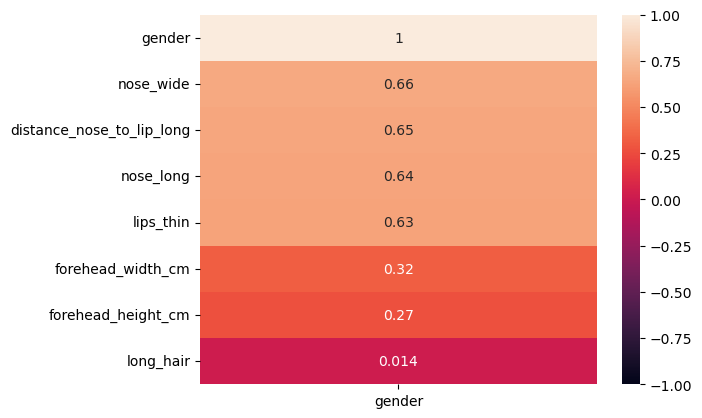

In [17]:
sns.heatmap(data.corr()[['gender']].sort_values(by = 'gender',ascending=False),vmax=1,vmin=-1,annot=True);

In [18]:
sc = StandardScaler()

In [19]:
x = sc.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building

In [21]:
model = Sequential()

In [22]:
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation ='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [24]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics= ['accuracy'])

### Define early stopping criteria

In [25]:
early_stopping = EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True,verbose=1)

### Model Training

In [26]:
history = model.fit(x_train,y_train,batch_size=30,callbacks=[early_stopping],epochs=1000,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/1000
96/96 [==============================] - 1s 4ms/step - loss: 0.2112 - accuracy: 0.9390 - val_loss: 0.1134 - val_accuracy: 0.9454
Epoch 2/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.9530 - val_loss: 0.1035 - val_accuracy: 0.9608
Epoch 3/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9530 - val_loss: 0.1176 - val_accuracy: 0.9440
Epoch 4/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9527 - val_loss: 0.1053 - val_accuracy: 0.9538
Epoch 5/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9548 - val_loss: 0.1054 - val_accuracy: 0.9524
Epoch 6/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9551 - val_loss: 0.1031 - val_accuracy: 0.9650
Epoch 7/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9565 - val_loss: 0.1036 - val_accuracy: 0.9608
Epoch 

96/96 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9653 - val_loss: 0.0958 - val_accuracy: 0.9692
Epoch 59/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9656 - val_loss: 0.0935 - val_accuracy: 0.9706
Epoch 60/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9695 - val_loss: 0.0992 - val_accuracy: 0.9622
Epoch 61/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9660 - val_loss: 0.0974 - val_accuracy: 0.9608
Epoch 62/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9684 - val_loss: 0.0939 - val_accuracy: 0.9622
Epoch 63/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9695 - val_loss: 0.0951 - val_accuracy: 0.9594
Epoch 64/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9674 - val_loss: 0.0967 - val_accuracy: 0.9594
Epoch 65/1000

### Evaluating the model

In [27]:
history_dict = history.history

### 1. Learning curve

In [28]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

### 2. Loss

In [29]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

### 3. Range of x or number of epochs in the graph

In [30]:
epochs = range(1,len(acc)+1)

### 4.Plot

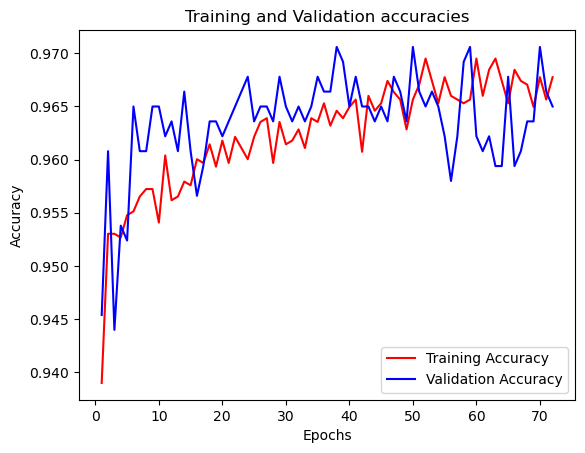

In [31]:
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title("Training and Validation accuracies")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
y_pred = model.predict(x_test)

23/23 [==============================] - 0s 874us/step


In [33]:
y_pred = (y_pred>0.5)

In [34]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[366,  10],
       [ 15, 323]], dtype=int64)

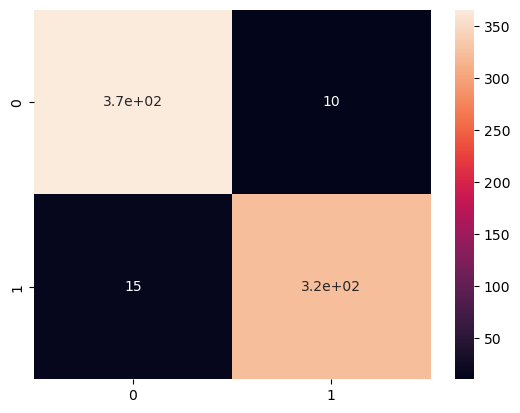

In [35]:
sns.heatmap(matrix,annot=True);

### Classification Report
A classification report is a tool used in machine learning to evaluate the performance of a classification
model. It provides a summary of various metrics that describe the model's performance, such as
precision, recall, and F1-score